# CS110: Decoding the relationships between genes

#### Gene Mutation is a general and computationally intensive research topic in Genetics. For this assignment, assume that a biotechnology company has hired you to work on a gene mutation research project. This project revolves around implementing a Python program to investigate genealogical mutation sequencing. In this program, a gene is described by a string of letters, with a letter being chosen from the set. A mutation is relatively rare, but it can occur. There is a small probability of either inserting a new character, deleting an existing one, or randomly changing to a new one. We can refer to these probabilities by p_insertion, p_deletion, and p_mutation. Now, suppose the starting point is a given string that undergoes a mutation process. This mutation created two other strings, the child strings of the first string. Each of these two new strings can undergo mutations by which they will change from their parent. The two-child strings mutate and create two new substrings, resulting in four grandchild strings from the original gene sequencing string. We can easily visualize the sequence of mutations if we were to draw a genealogy binary tree relating strings to their parent and grandparent strings. As a result of these mutations, we now have seven strings, but unfortunately, the order of the strings has been lost due to a glitch in the gene-sequencing generation program. Your goal is to recover the genealogy tree for the following set of seven strings labelled with lowercase letters:

In [139]:
set_strings = [('a', 'ACAGCAAGCCATTCCTTAGAGAACGAAATTACGGCGACCGTCAGGGGCATAGCTCCGAGGCATACACTGACGTGTTGGGA'),
               ('b', 'CAGCAGCACAGTCCTGAGATAGCGAAATGAACCGCGACCGTCAGGGGCCTTCGGCCTCCCGAGGTATTACGGCTGACAGTGGTTGGGA'),
               ('c', 'GCACCAAGCCTTCACTAGAGGAACCCAGAACTAAGGGTCAGACCGTGTCGGGCCATGCATGCCGAGGTATTACGGACTAGTACGA'),
               ('d', 'CAGCAGCACAGTCCTGAGATGACGAAATTAACCGGCGACCGTCAGGGGCCATAGCCTCCGGGGCATACGACTGACGTGGTGGGA'),
               ('e', 'GCAGCAAGCCTTCACTTAGAGAACCGAAACTAGGGCAGACGGTCGGGCATGCATGCCGAGGATATACGGACTAGTACGGGA'),
               ('f', 'GCTAGCACAAGCCTTCACTTAGATGAACCTAAACTAGGCAGACGGGTCGGCAAGCATAGTCCGAGGATATACAGCGACTAGTACGGG'),
               ('g', 'CAGCAGACAGCTCCTTGTGATGAACGAAATCAACCGGCGACCATGCAGGCGGCCATAGCCTCCGGTGGCATCACGACTGAGCCGTGGTGGA')]

# Question 1

#### Write Python code that, given any two arbitrary strings, outputs all of the Longest Common Subsequences (LCSs) for those two strings and their corresponding lengths. Include several test cases that demonstrate that your code is correct.

The Longest Common Subsequence (LCS) algorithm is a classic dynamic programming approach to solving the problem of finding the longest subsequence that is present in two given sequences. This code is an implementation of the LCS algorithm, which has been adapted to be able to print all LCSs. It takes as input two strings, sequence1 and sequence2, and returns a tuple containing the length of the LCS and the matrix used to compute it.

The matrix is generated using a bottom-up approach, where each cell in the matrix stores the length of the LCS of the substrings sequence1[0…i-1] and sequence2[0…j-1]. The matrix is filled by looping over the characters of sequence1 and sequence2. When the current characters of sequence1 and sequence2 are the same, the value of the current cell is updated by adding 1 to the value of the cell above-left of the current cell (i.e., matrix[i - 1][j - 1]). If the current characters are different, the value of the current cell is set to the maximum value of the cell above it (matrix[i - 1][j]) and the cell to the left of it (matrix[i][j - 1]).

After the matrix has been generated, the length of the LCS can be calculated by taking the value of the bottom-right cell of the matrix (i.e., matrix[-1][-1]). This value represents the maximum possible value of the LCS for the given input strings.

In addition to computing the length of the LCS, this code is also able to print all LCSs. The *all_longest_common_subsequences()* function uses a recursive approach to find all longest common subsequences (LCS) of sequence1 and sequence2. It starts by checking if the last characters of sequence1 and sequence2 match. If they do, it finds all LCS of the substrings sequence1[0…m-2] and sequence2[0…n-2], and appends the current last character to each of these LCS. This process continues until the top-left cell of the LCS matrix is reached, at which point all possible LCSs have been generated. If the last characters of sequence1 and sequence2 don't match, the function moves to the cell with the maximum value: either the cell above it or the cell to the left of it, depending on which cell has the higher value. This process continues until the top-left cell is reached, and all possible LCSs are returned.

In [140]:
import pandas as pd


def longest_common_subsequences_matrix(sequence1, sequence2):
    """ 
    Generates the longest common subsequences (LCS) matrix for `sequence1` and `sequence2` and calculates the length of the LCS.

    More information:
    - `matrix[i][j]` stores the length of LCS of `sequence1[0…i-1]` and `sequence2[0…j-1]`.
    - Table is filled in a bottom-up manner.

    Inputs
    ----------
    sequence1, sequence2: strings
        Sequences for which to compute the longest common substring
    matrix: list
        List of the LCS

    Returns
    ----------
    (matrix, matrix[-1][-1]): tuple (list, int)
        Tuple containing the LCS matrix and the length of the LCS
    """

    m, n = len(sequence1), len(sequence2)  # length of the sequences

    # create a lookup table to store solutions of subproblems
    matrix = [[0]*(n+1) for j in range(m+1)]

    # fill the lookup table in a bottom-up manner
    for i in range(1, m + 1):
        for j in range(1, n + 1):
            # check if the current character of `sequence1` and `sequence2` matches, if yes, then update the value of the current cell
            if sequence1[i - 1] == sequence2[j - 1]:
                matrix[i][j] = matrix[i - 1][j - 1] + 1
            # otherwise, if the current character of `sequence1` and `sequence2` don't match, take the maximum value from the top and left cells
            else:
                matrix[i][j] = max(matrix[i - 1][j], matrix[i][j - 1])

    return (matrix, matrix[-1][-1])


def all_longest_common_subsequences(sequence1, sequence2, m, n, matrix):
    """
    Helper function recursively calculate all longest common subsequences (LCS) of `sequence1` and `sequence2`

    Inputs
    ----------
    sequence1, sequence2: strings
        Sequences for which to compute the longest common substring
    m, n: int
        Lengths of the sequence1, sequence2, respectively
    matrix: list
        longest common subsequence matrix for sequence1 and sequence2

    Returns
    ----------
    all_lcs: list
        List of all longest common subsequences of `sequence1` and `sequence2`
    """

    # if we have reached the end of either sequence, return empty string
    if m == 0 or n == 0:
        return ['']

    # if the last character of `sequence1` and `sequence2` matches
    if sequence1[m - 1] == sequence2[n - 1]:
        # find all LCS of substring `sequence1[0…m-2]` and `sequence2[0…n-2]`
        lcs = all_longest_common_subsequences(
            sequence1, sequence2, m - 1, n - 1, matrix)

        # append the current last character to all LCS of substring `sequence1[0…m-2]` and `sequence2[0…n-2]`
        for i in range(len(lcs)):
            lcs[i] += (sequence1[m - 1])
        return lcs

    # if the last character of `sequence1` and `sequence2` don't match

    # if the top cell has more value than the left cell, then consider the top cell
    if matrix[m - 1][n] > matrix[m][n - 1]:
        # return LCS of substring `sequence1[0…m-2]` and `sequence2[0…n-1]`
        return all_longest_common_subsequences(sequence1, sequence2, m - 1, n, matrix)

    # if the left cell has more value than the top cell, then consider the left cell
    if matrix[m][n - 1] > matrix[m - 1][n]:
        # return LCS of substring `sequence1[0…m-1]` and `sequence2[0…n-2]`
        return all_longest_common_subsequences(sequence1, sequence2, m, n - 1, matrix)

    # if the top cell has equal value to the left cell, then consider both cells
    # return all LCS of substring `sequence1[0…m-2]` and `sequence2[0…n-1]`
    top, left = all_longest_common_subsequences(
        sequence1, sequence2, m - 1, n, matrix), all_longest_common_subsequences(sequence1, sequence2, m, n - 1, matrix)

    all_lcs = top + left  # merge the two lists
    return all_lcs


def longest_common_subsequence(sequence1, sequence2):
    """
    Returns all the longest common subsequence (LCS) of `sequence1` and `sequence2`.

    Inputs
    ----------
    sequence1, sequence2: strings
        Strings to compute the LCS

    Returns
    ----------
    all_lcs: tuple ([LCS1, LCS2, ...], len(LCS1))
        Tuple of a list of all the possible LCS and the corresponding length of the LCS

    Uses
    ----------
    longest_common_subsequences_matrix(): function to generate the LCS matrix.
    all_longest_common_subsequences(): helper function to generate all the LCS.
    """

    # generate the LCS matrix
    matrix = longest_common_subsequences_matrix(sequence1, sequence2)[0]

    # find all LCS of `sequence1` and `sequence2` using the LCS matrix
    lcs = all_longest_common_subsequences(
        sequence1, sequence2, len(sequence1), len(sequence2), matrix)

    # if there is no LCS, return (None, 0)
    if all(x == '' for x in lcs):
        return (None, 0)

    # return the reversely sorted list (because of the given test cases) of all LCS and the length of the LCS
    return (sorted(list(set(lcs)), reverse=True), len(lcs[0]))


### Testing the algorithm

In [141]:
test_cases = {
    "Test 1": {
        "input": ['ABCBDAB', 'BDCABA'],
        "correct_output": (['BDAB', 'BCBA', 'BCAB'], 4)
    },
    "Test 2": {
        "input": ['abc', ''],
        "correct_output": (None, 0)
    },
    "Test 3": {
        "input": ['abc', 'a'],
        "correct_output": (['a'], 1)
    },
    "Test 4": {
        "input": ['abc', 'ac'],
        "correct_output": (['ac'], 2)
    },
    "Test 5": {
        "input": ['abcdef', 'abcdef'],
        "correct_output": (['abcdef'], 6)
    },
    "Test 6": {
        "input":  ["abcdef", "zyxwvut"],
        "correct_output": (None, 0)
    },
    "Test 7": {
        "input": ["", ""],
        "correct_output": (None, 0)
    },
    "Test 8": {
        "input": ["abcdef", "abcfghei"],
        "correct_output": (['abcf', 'abce'], 4)
    }     
}

# loop through all test cases
for test in test_cases:      
    try:
        # check if the result of the function is the same as the manually calculated correct result
        assert test_cases[test]["correct_output"] == longest_common_subsequence(*test_cases[test]["input"])
        print(
            f"\t✅ {test} passed.\n\tExpected {test_cases[test]['correct_output']}.\n\tGot {longest_common_subsequence(*test_cases[test]['input'])}\n")
    except AssertionError:
        # if the result is not the same as the correct result, print the error message
        print(
            f"\t❌ {test} failed.\n\tExpected {test_cases[test]['correct_output']}.\n\tGot {longest_common_subsequence(*test_cases[test]['input'])}\n")


	✅ Test 1 passed.
	Expected (['BDAB', 'BCBA', 'BCAB'], 4).
	Got (['BDAB', 'BCBA', 'BCAB'], 4)

	✅ Test 2 passed.
	Expected (None, 0).
	Got (None, 0)

	✅ Test 3 passed.
	Expected (['a'], 1).
	Got (['a'], 1)

	✅ Test 4 passed.
	Expected (['ac'], 2).
	Got (['ac'], 2)

	✅ Test 5 passed.
	Expected (['abcdef'], 6).
	Got (['abcdef'], 6)

	✅ Test 6 passed.
	Expected (None, 0).
	Got (None, 0)

	✅ Test 7 passed.
	Expected (None, 0).
	Got (None, 0)

	✅ Test 8 passed.
	Expected (['abcf', 'abce'], 4).
	Got (['abcf', 'abce'], 4)



As we can see, all the test cases successfully pass the test cases which include multiple LCSs, no LCSs, and a single LCS, single character LCS, and LCSs of different lengths. The algorithm is able to correctly identify all LCSs for each of these test cases.

# Question 2

#### How many LCSs are there in set_strings? 

In order to calculate we have to go through every combination of strings in the set and calculate the number of LCS for each pair. To do this, we can use a nested for loop. To avoid duplicates that are shown in the example matrix generated by the double for loop in the example below and to avoid calculating the LCS of a string with itself, we modify the for loop to only calculate only the top right part of the matrix below.

In [142]:
example_set_strings = ['a', 'b', 'c', 'd', 'e', 'f', 'g']
example_matrix = [[0 for i in range(len(example_set_strings))] for j in range(len(example_set_strings))]

# fill the matrix with the concatenation of row and column names to demonstrate the duplicates
for row in range(len(example_set_strings)):
    for column in range(len(example_set_strings)):
        example_matrix[row][column] = example_set_strings[row] + example_set_strings[column]

# convert the matrix to a pandas dataframe to plot it nicely
column_row_names = ["a", "b", "c", "d", "e", "f", "g"]
example_matrix_pd = pd.DataFrame(example_matrix).set_axis(column_row_names, axis="columns").set_axis(column_row_names, axis="index")
print(example_matrix_pd)
    

    a   b   c   d   e   f   g
a  aa  ab  ac  ad  ae  af  ag
b  ba  bb  bc  bd  be  bf  bg
c  ca  cb  cc  cd  ce  cf  cg
d  da  db  dc  dd  de  df  dg
e  ea  eb  ec  ed  ee  ef  eg
f  fa  fb  fc  fd  fe  ff  fg
g  ga  gb  gc  gd  ge  gf  gg


Instead, we modify the nested for loop to only calculate the top right part of the matrix above, as demonstrated below:

In [143]:
example_set_strings = ['a', 'b', 'c', 'd', 'e', 'f', 'g']
example_matrix = [[0 for i in range(len(example_set_strings))] for j in range(len(example_set_strings))]

# fill the matrix with the concatenation of row and column names that the change in 
for row in range(len(example_set_strings)):
    for column in range(row+1, len(example_set_strings)): # the change is here; we only fill the upper triangle of the matrix by starting at row+1
        example_matrix[row][column] = example_set_strings[row] + example_set_strings[column]

# convert the matrix to a pandas dataframe to plot it nicely
column_row_names = ["a", "b", "c", "d", "e", "f", "g"]
example_matrix_pd = pd.DataFrame(example_matrix).set_axis(column_row_names, axis="columns").set_axis(column_row_names, axis="index")
print(example_matrix_pd)

   a   b   c   d   e   f   g
a  0  ab  ac  ad  ae  af  ag
b  0   0  bc  bd  be  bf  bg
c  0   0   0  cd  ce  cf  cg
d  0   0   0   0  de  df  dg
e  0   0   0   0   0  ef  eg
f  0   0   0   0   0   0  fg
g  0   0   0   0   0   0   0


Applying this to the set_strings and by summing the number of LCS for each pair, we get the following code.

In [164]:
def total_number_of_lcs():
    """ 
    Computes the total number of longest common substrings between all pairs of DNA strings in set_strings without duplicates and counting itself.
    This respresents the top right triangle of the combinations matrix without the diagonal.

    Returns
    ----------
    total_lcs_sum: int
        Number of longest common substrings between all pairs of strings in the set_strings.
    """

    # initialize the total number of LCSs vairable
    total_lcs_sum = 0

    # traverse through all pairs of strings only once (upper triangle of the combinations matrix wihout the diagonal) 
    for row in range(len(set_strings)):
        for column in range(row+1, len(set_strings)):
            sequence1, sequence2 = set_strings[row][1], set_strings[column][1]
            # get the list of all LCS and the length of the first LCS
            lcs_list, lcs_length = longest_common_subsequence(sequence1, sequence2)
            # if there is at least one LCS, add the total number of LCSs to the total
            if lcs_list is not None:
                total_lcs_sum += len(lcs_list)
    return total_lcs_sum

print("The total number of longest common substrings between all pairs of DNA strings in set_strings is", total_number_of_lcs())

The total number of longest common substrings between all pairs of DNA strings in set_strings is 2021


As we can see, there are in total 19 LCSs int the set_strings.

#### Generate the matrix of the lengths of the LCS for every pair of strings in set_strings. Make sure that your matrix obeys the following properties: 
1.  The matrix should be cast as a two-dimensional numpy array. Store this 2D numpy array to a variable named len_lcs_matrix.
2.  Your 2D array len_lcs_matrix should have dimension (7,7), and len_lcs_matrix[i,j] should give the length of the LCS for the ith and jth strings. For example, len_lcs_matrix[0,3] gives the length of the LCS for string a and string d.

Analogous to the approach from the beginning of Question 2, we firstly create the 2D numpy array 7x7 where each cell will contain the length of the LCS for the *i*th and *j*th strings. We then, much like we did at the beginning of Question 2, use a nested for loop to get all the string combinations *i* and *j* for which we calculate the length of the LCS which we then store in the corresponding cell of the matrix. The code is shown below.

In [145]:
import numpy as np

# create a matrix of zeros with the dimensions (number of strings) x (number of strings) = (7 x 7)
len_lcs_matrix = np.array([[0 for i in range(len(set_strings))] for j in range(len(set_strings))])

# fill the matrix with the length of the longest common substring between all pairs of strings

# traverse through all pairs of strings
for row in range(len(set_strings)):
    for column in range(len(set_strings)):
        # get the sequences from the set_strings
        sequence1, sequence2 = set_strings[row][1], set_strings[column][1]
        # get the length of the longest common substring between the two sequences and store it in the matrix cell for those two sequences 
        len_lcs_matrix[row][column] = longest_common_subsequences_matrix(sequence1, sequence2)[1]

# convert the matrix to a pandas dataframe to plot it nicely
column_row_names = ["a", "b", "c", "d", "e", "f", "g"]
lcs_table = pd.DataFrame(len_lcs_matrix).set_axis(column_row_names, axis="columns").set_axis(column_row_names, axis="index")
print(lcs_table)


    a   b   c   d   e   f   g
a  80  69  62  73  67  66  70
b  69  88  62  76  62  61  72
c  62  62  85  61  75  72  61
d  73  76  61  84  62  63  79
e  67  62  75  62  81  76  63
f  66  61  72  63  76  87  65
g  70  72  61  79  63  65  91


As we can see, the we obtain the matrix that containts the length of the LCS for every pair of strings in set_strings. The value at the diagonal are the lengths of the strings themselves, since the length of the longest common subsequence of a string with itself is the length of the string itself.

#### Manually examine the matrix you obtained above. Can you infer which strings are more strongly related to each other? Explain your answer.

Examining the matrix, we can infer similarity of all strings to each of the strings ['a','b','c','d','e','f','g'] by looking at their respective rows and evaluating how close to the length of that sequence the LCS between that the two strings is. For example, let's say we want to see how similar other strings are to string 'a'. We locate string 'a' row, which is the first row. 


``` 
    a   b   c   d   e   f   g
a  80  69  62  73  67  66  70
```

We can see that the LCS between string 'a' and string 'b' is 69 characters long, which means 'b' is 69/80% similar to string 'a'. Essentially, the closer the LCS length is to the length of the string, the more similar the two strings are. As such, we can see that the closest strings to string 'a' are string 'd' and string 'g', which are 73/80% and 70/80% similar to string 'a', respectively.

We can apply this process to the entire matrix by dividing each cell in that row by the length of the string in that row. This will give us a matrix that contains the percentage of similarity between each pair of strings. The code to do this is shown below.

In [146]:
# create a matrix of zeros with the dimensions (number of strings) x (number of strings) = (7 x 7)
matrix_of_ratios = [[0 for i in range(len(set_strings))] for j in range(len(set_strings))]

# fill the matrix with the ratio of the length of the longest common substring to the length of the first sequence
for row in range(len(set_strings)):
    for column in range(len(set_strings)):
        sequence1 = set_strings[row][1]
        sequence2 = set_strings[column][1]
        matrix_of_ratios[row][column] = round(longest_common_subsequences_matrix(sequence1, sequence2)[1]/len(sequence1),2)

ratio_table = pd.DataFrame(matrix_of_ratios).set_axis(column_row_names, axis="columns").set_axis(column_row_names, axis="index")
ratio_table


,a,b,c,d,e,f,g
a,1.00,0.86,0.78,0.91,0.84,0.82,0.88
b,0.78,1.00,0.70,0.86,0.70,0.69,0.82
c,0.73,0.73,1.00,0.72,0.88,0.85,0.72
d,0.87,0.90,0.73,1.00,0.74,0.75,0.94
e,0.83,0.77,0.93,0.77,1.00,0.94,0.78
f,0.76,0.70,0.83,0.72,0.87,1.00,0.75
g,0.77,0.79,0.67,0.87,0.69,0.71,1.00


As the result, we can now order the strings by their similarity to each string by sorting the matrix by sorting the rows. For example, in row 4, we see that the most similar string to string 'd' is string 'g' with the LCS matching 94% of the string 'd'.

# Question 3

You will now examine the precise relationships between strings (i.e., explicitly identify the great-grandparent, grandparent, parent, and child strings). You will do so by proposing and implementing two strategies: one that is local and another that is global. You will need to describe the strategies clearly to the extent that anyone will be able to grasp what the underlying strategy of your approach is. You need to focus on explaining how and why it works. 

Note: 
1. A local strategy infers the location of a particular string in the tree based on a greedy property (of your choice) of the node itself. Specifically, we compare each node with its immediate neighbors. For instance, we compare the root with its children only, but not with its grandchildren.
2. A global strategy infers the whole tree based on a metric obtained by considering all the relationships involved in that tree at once. This is very similar to the dynamic programming approach we discussed to solve the coin problem in class. You may need to research what a good metric could describe global relationships (i.e., beyond what was discussed in class).
3. After describing and implementing your strategies, draw the resulting genealogy binary tree(s) associated with Set_Strings resulting from each strategy. Comment on whether the results (the tree predictions) are expected to be the same or different. Provide a concise comparison between these results and the insights you have included in your answer to question 2.3.

## Local strategy

### Levenshtein distance

To achieve this strategy, we will firstly define a metric different than LCS. This is because LCS is a suboptimal metric for this problem since it is biased towards insertions. Generally, we know that the further we go down in the generation chain, the higher the likeliness of being different from the ancestor root. This is something that is true in real-life too, but also true from a mathematical perspective. Lets assume a child B has been stochastically changed in some way (had insertion(s), deletion(s), substitution(s)) from root A. In the next generation (this child B's child) has far greater likeliness of changing to be different that the child B, and has much greater likeliness to be different than the root A, and not to mutate back to be more similar to root A that child B is. Even if only mutations were possible, the likeliness for a changed gene (which is 1 out of potentially 100) to mutate back into the correct gene (which is 1 out of 4 aminoacids) is so small we can assume that it will never happen. 

Consequently, we want a more superior metric to LCS and one that takes all three possible changes into account. To accomplish that, we will use Levenshtein edit distance. The Levenshtein distance, also known as the edit distance, is a measure of how similar two strings are to one another. The distance represents the *minimal* number of insertions, deletions, or substitutions required to transform one string into the other. For example,

The Levenshtein distance between "ABCD" and "HCDE" is 3, since the following two edits are needed to transform the one word into the other: "ABCD" -> "HBCD" -> "HCD" -> "HCDE".

The algorithm works by creating a matrix that has the lengths of the two input strings as its dimensions. Each cell in the matrix represents the Levenshtein distance between the substrings of the two input strings that end at the positions represented by the row and column of the cell.

For example, if the two input strings are "ABCD" and "ACE", the matrix will have 4 rows and 3 columns, since "ABCD" has 4 characters and "ACE" has 3 characters. The cells in the matrix are then filled in using the following rules:

1. The distance between two empty strings is 0.
2. The distance between a non-empty string and an empty string is the length of the non-empty string.
3. The distance between two non-empty strings is calculated as follows:
4. If the last characters of the two strings are the same, the distance is the same as the distance between the substrings that exclude the last characters of the two strings.
5. If the last characters of the two strings are different, the distance is 1 plus the minimum of the distances between the substrings that exclude the last characters of the two strings, or the distance between the substrings that exclude the last character of only one of the two strings.
6. Once the matrix is filled in, the Levenshtein distance between the two input strings is given by the value in the bottom-right cell of the matrix.

Although this can easily be solved using recursion, we will use dynamic programming to solve this problem because it allows for an efficient way to calculate the Levenshtein distance between two strings since the distance between two strings can be expressed as the minimum of the Levenshtein distances between substrings of the two strings.

By using dynamic programming, we are algorithm able to avoid recalculating the Levenshtein distances between the same substrings multiple times. Instead, it stores the distances in a matrix and uses the previously calculated values (memoization) to compute new values in a bottom-up manner. This allows the algorithm to run in O(n*m), where n, m are the lengths of the strings, time, which is the size of the matrix, rather than the O(3^n) where n is the length of the longer string, time that it would take to solve the problem using recursion.

Similar to the LCS dynamic programming solution, the code first defines the dimensions of the matrix that will be used to store the distances between substrings of the two sequences. It then initializes the matrix with zeros and fills the first row and column with the lengths of the two sequences.

Next, the code fills in the remaining cells of the matrix in a bottom-up manner. For each cell, it checks if the characters at the corresponding positions in the two sequences are the same. If they are, it sets the value of the cell to be the same as the value in the cell to the right and down from it, since the distance between the substrings ending at those positions is the same as the distance between the substrings ending at the current positions.

If the characters at the corresponding positions in the two sequences are different, the code sets the value of the cell to be 1 plus the minimum of the values in the cells to the right, down, and down-right from it, since the distance between the substrings ending at the current positions is 1 more than the minimum of the distances between the substrings ending at those positions.

Once the matrix is filled in, the code returns the matrix and the distance between the two sequences, which is given by the value in the top-left corner of the matrix.

We calculate the Levenshtein distance between each pair of strings in the set and store the results in a matrix.

In [147]:
def levenshtein_distance(sequence1, sequence2):
    """
    Computes the Levenshtein distance between two sequences. 
    The Levenshtein distance is the minimum number of single-character edits (insertions, deletions or mutations)
    required to change one sequence into the other.

    Example: levenshtein_distance("ABCE", "AD") = 3
             3 is the minimum number of edits to get from "ABCE" to "AD": (delete any two characters from substring 'BCE' and convert the remaning character to 'D').

    Parameters
    ----------
    sequence1: str
        First sequence.
    sequence2: str
        Second sequence.

    Returns
    ----------
    (matrix, matrix[m][n]): tuple
        The DP matrix used to calculate the Levenshtein distance and the Levenshtein distance.
    """

    # define the dimensions of the matrix
    m, n = len(sequence1), len(sequence2)

    # initialize the matrix of size m*n with zeros
    matrix = [[0]*(n+1) for j in range(m+1)]

    # fill the first row and column of the matrix with the number of characters in the sequence
    for i in range(m+1):
        matrix[i][n] = m - i
    for j in range(n+1):
        matrix[m][j] = n - j

    # fill the rest of the matrix
    # traverse the matrix from the bottom right corner to the top left corner
    for i in range(m - 1, -1, -1):
        for j in range(n-1, -1, -1):
            # if the characters are the same, the distance is the same as the distance of the two shorter sequences
            if sequence1[i] == sequence2[j]:
                matrix[i][j] = matrix[i+1][j+1]
            # if the characters are different, the distance is the minimum of the distance of the two shorter sequences + 1
            else:
                matrix[i][j] = 1 + min(matrix[i][j+1], matrix[i+1][j], matrix[i+1][j+1])
            
    # return the distance between the two sequences which is the value in the top left corner of the matrix
    return (matrix, matrix[0][0])


def levenshtein_distance_all_pairs(set_strings):
    """
    Computes the Levenshtein distance between all pairs of sequences in the set_strings and returns a matrix containing the edit distances.

    Parameters
    ----------
    set_strings: list
        List of tuples of the form (name, sequence) where name is the name of the sequence and sequence is the sequence itself.

    Returns
    ----------
    levenshtein_distance_matrix: numpy array
        Matrix of Levenshtein distances between all pairs of sequences in the set_strings.
    """
    levenshtein_distance_dict = {}

    # create a matrix of zeros with the dimensions (number of strings) x (number of strings) = (7 x 7)
    levenshtein_distance_matrix = np.array([[0 for i in range(len(set_strings))] for j in range(len(set_strings))])

    # fill the matrix with the Levenshtein distance between all pairs of strings
    # traverse through all pairs of strings
    for row in range(len(set_strings)):
        for column in range(len(set_strings)):
            # get the sequences from the set_strings
            sequence1, sequence2 = set_strings[row][1], set_strings[column][1]
            # get the Levenshtein distance between the two sequences and store it in the corresponding matrix cell for those two sequences 
            levenshtein_distance_matrix[row][column] = levenshtein_distance(sequence1, sequence2)[1]
            levenshtein_distance_dict[(set_strings[row][0], set_strings[column][0])] = levenshtein_distance(sequence1, sequence2)[1]
    return levenshtein_distance_matrix, levenshtein_distance_dict

levenshtein_distance_matrix, levenshtein_distance_dict = levenshtein_distance_all_pairs(set_strings)

column_row_names = ["a", "b", "c", "d", "e", "f", "g"]
levenshtein_distance_matrix_pd = pd.DataFrame(levenshtein_distance_matrix).set_axis(column_row_names, axis="columns").set_axis(column_row_names, axis="index")
levenshtein_distance_matrix_pd

,a,b,c,d,e,f,g
a,0,22,30,14,20,28,24
b,22,0,36,14,35,40,23
c,30,36,0,34,14,23,42
d,14,14,34,0,31,37,14
e,20,35,14,31,0,14,39
f,28,40,23,37,14,0,40
g,24,23,42,14,39,40,0


We use the matrix above to find the correct root of the tree. As explained above, we know that as the generations go down, the likeliness of the child being different from the parent increases. Thus, we can asusme that the correct root will have the greatest similarity to its ancestors. We can use this to our advantage to find the correct root. One very simple way to do that is to, for every possible root, check what its distance to the node farthest away is. This node certainly represents that potential roots grandchild. We can repeat this for every possible root and find the one with the smallest distance to its grandchild. This is likely to be the correct root since it is the smallest distance away from its farther grandchild.

By coding what is explained above, we obtain the following:

In [148]:
print(levenshtein_distance_dict)

{('a', 'a'): 0, ('a', 'b'): 22, ('a', 'c'): 30, ('a', 'd'): 14, ('a', 'e'): 20, ('a', 'f'): 28, ('a', 'g'): 24, ('b', 'a'): 22, ('b', 'b'): 0, ('b', 'c'): 36, ('b', 'd'): 14, ('b', 'e'): 35, ('b', 'f'): 40, ('b', 'g'): 23, ('c', 'a'): 30, ('c', 'b'): 36, ('c', 'c'): 0, ('c', 'd'): 34, ('c', 'e'): 14, ('c', 'f'): 23, ('c', 'g'): 42, ('d', 'a'): 14, ('d', 'b'): 14, ('d', 'c'): 34, ('d', 'd'): 0, ('d', 'e'): 31, ('d', 'f'): 37, ('d', 'g'): 14, ('e', 'a'): 20, ('e', 'b'): 35, ('e', 'c'): 14, ('e', 'd'): 31, ('e', 'e'): 0, ('e', 'f'): 14, ('e', 'g'): 39, ('f', 'a'): 28, ('f', 'b'): 40, ('f', 'c'): 23, ('f', 'd'): 37, ('f', 'e'): 14, ('f', 'f'): 0, ('f', 'g'): 40, ('g', 'a'): 24, ('g', 'b'): 23, ('g', 'c'): 42, ('g', 'd'): 14, ('g', 'e'): 39, ('g', 'f'): 40, ('g', 'g'): 0}


#### Finding the correct root (grandparent/ancestor) of the tree

In [149]:
def find_root(levenshtein_distance_dict):
    """
    Finds the root of the tree by traversing through the levensthein distance matrix and for each potential root, finds its fartherst successor string.
    Returns the one with the smallest distance to its farthest successor.

    Parameters
    ----------

    levenshtein_distance_dict: dict
        Dictionary of Levenshtein distances between all pairs of sequences in the set_strings. Format: {(name1, name2): distance}

    Returns
    ----------
    root: str
        The root of the tree.
    """

    possible_roots = ["a", "b", "c", "d", "e", "f", "g"]

    current_minimum_farthest_successor_distance = float("inf")
    correct_root = None

    # traverse through all possible roots
    for root in possible_roots:
        # for each root, find the character that is the farthest from it
        farthest_successor = max(levenshtein_distance_dict, key=lambda x: levenshtein_distance_dict[x] if x[0] == root else 0)[1]
        # for each root, find the distance between the root and its farthest successor
        distance_to_farthest_successor = levenshtein_distance_dict[(root, farthest_successor)]
        print("Root: ", root, "Farthest successor: ", farthest_successor, "Distance: ", distance_to_farthest_successor)
        # find the root with the smallest distance to its farthest successor
        if distance_to_farthest_successor < current_minimum_farthest_successor_distance:
            current_minimum_farthest_successor_distance = distance_to_farthest_successor
            correct_root = root

    return correct_root
        
    
levenshtein_distance_dict = {('a', 'a'): 0, ('a', 'b'): 22, ('a', 'c'): 30, ('a', 'd'): 14, ('a', 'e'): 20, ('a', 'f'): 28, ('a', 'g'): 24, ('b', 'a'): 22, ('b', 'b'): 0, ('b', 'c'): 36, ('b', 'd'): 14, ('b', 'e'): 35, ('b', 'f'): 40, ('b', 'g'): 23, ('c', 'a'): 30, ('c', 'b'): 36, ('c', 'c'): 0, ('c', 'd'): 34, ('c', 'e'): 14, ('c', 'f'): 23, ('c', 'g'): 42, ('d', 'a'): 14, ('d', 'b'): 14, ('d', 'c'): 34, ('d', 'd'): 0, ('d', 'e'): 31, ('d', 'f'): 37, ('d', 'g'): 14, ('e', 'a'): 20, ('e', 'b'): 35, ('e', 'c'): 14, ('e', 'd'): 31, ('e', 'e'): 0, ('e', 'f'): 14, ('e', 'g'): 39, ('f', 'a'): 28, ('f', 'b'): 40, ('f', 'c'): 23, ('f', 'd'): 37, ('f', 'e'): 14, ('f', 'f'): 0, ('f', 'g'): 40, ('g', 'a'): 24, ('g', 'b'): 23, ('g', 'c'): 42, ('g', 'd'): 14, ('g', 'e'): 39, ('g', 'f'): 40, ('g', 'g'): 0}
print(f"\nThe correct root is node {find_root(levenshtein_distance_dict)}")

Root:  a Farthest successor:  c Distance:  30
Root:  b Farthest successor:  f Distance:  40
Root:  c Farthest successor:  g Distance:  42
Root:  d Farthest successor:  f Distance:  37
Root:  e Farthest successor:  g Distance:  39
Root:  f Farthest successor:  b Distance:  40
Root:  g Farthest successor:  c Distance:  42

The correct root is node a


Now that we found the correct root: *a*, the next step in our local approach is to define the greedy property. As explained above, we want to pick the two closest children to the root. Thus, for root *a* we look at its distances away from other nodes and pick the two closest to them, indicating its children. This makes sense, because, as we explained, the children of the parent will be its most similar nodes. We repeat this process for each child until we reach the leaves of the tree. 

This is a very simple strategy and easy to implement, so much so, that we can quickly find the correct tree just by looking at the Levenshthein distance matrix. However, this is not the case for larger trees. Thus, we will use a greedy approach to find the correct tree.

The *construct_minimum_spanning_BST* method from the following class is used to construct a minimum spanning binary search tree (BST) from a set of genes. The tree is constructed in a greedy manner, by adding nodes to the tree in such a way that the total distance between all nodes in the tree is minimized.

The function first creates a dictionary that maps each gene in the input set to a number. It then uses a queue to traverse the tree in a breadth-first manner, starting from the root node. For each node in the tree, the function calculates the distances between that node and all other nodes in the tree that have not yet been visited. It then selects the node with the minimum distance to the current node as the next child node, and adds it to the tree. This process continues until all nodes in the tree have been visited indicating that the tree has been fully constructed.

The resulting tree is a minimum spanning BST, meaning that the total distance between all nodes in the tree is minimized which is what we want.

In [150]:
import math
from collections import deque


class GeneologyTree:
    """ 
    Class for the geneology tree.

    Parameters
    ----------
    root: str
        The root of the tree.

    levenshtein_distance_matrix: numpy array
        Matrix of Levenshtein distances between all pairs of sequences in the set_strings.

    Attributes
    ----------
    root: str
        The root of the tree.

    left: GeneologyTree
        The left child of the tree.

    right: GeneologyTree
        The right child of the tree.

    levenshtein_distance_matrix: numpy array
        Matrix of Levenshtein distances between all pairs of sequences in the set_strings.

    Methods
    ----------
    construct_minimum_spanning_BST
(gene_set)
        Constructs the tree dynamically.    
    """

    def __init__(self, root):
        """
        Constructs all the necessary attributes for the GeneologyTree object.

        Parameters
        ----------
        root: str
            The root of the tree.     
        """
        self.root = root
        self.left = None
        self.right = None
        #self.levensthein_distance_matrix = levenshtein_distance_matrix

    def construct_minimum_spanning_BST(self, gene_set):
        """
        Constructs the tree dynamically. 

        Parameters
        ----------
        gene_set: list
            List of all the genes in the tree.
        """

        # create a dictionary that maps each gene to a number
        gene_dict = {}
        # traverse through all genes in the gene_set, and map each gene to a number
        # e.g., if the gene_set = ["a", "b", "c", "d", "e", "f", "g"], then gene_dict = {"a": 1, "b": 2, "c": 3, "d": 4, "e": 5, "f": 6, "g": 7}
        for index, gene in enumerate(gene_set):
            gene_dict[gene[0]] = index

        # create a queue for the tree traversal
        q = deque()
        q.append(self)  # append the root to the queue
        visited = set()  # set of all the visited nodes

        # list of all the genes in the tree (e.g., ["a", "b", "c", "d", "e", "f", "g"])
        keys = list(gene_dict.keys())
        elements = len(keys)  # number of elements in the tree (e.g., 7)
        # number of tree_list in the tree (e.g., 3)
        counter = math.floor(math.log2(elements))

        levenshtein_distance_matrix = levenshtein_distance_all_pairs(gene_set)[0] 

        while counter >= 0:  # traverse through all tree_list in the tree

            parent = q.popleft()  # pop the parent node from the queue
            # get the index of the parent node in the levenshtein distance matrix
            idx = gene_dict[parent.root]
            # add the parent node to the visited set
            visited.add(gene_dict[parent.root])
            # get the list of distances between the parent node and all other nodes in the tree
            child_list = levenshtein_distance_matrix[idx][:]

            

            first_child = (0, float('inf'))  # initialize the first child node
            # traverse through all the child nodes
            for child_idx in range(len(child_list)):
                if child_idx in visited:  # if the child node is already visited, skip
                    continue

                # if the distance between the parent node and the child node is smaller than the distance between the parent node and the current first child node,
                if child_list[child_idx] < first_child[1]:
                    # update the first child node to the current child node
                    first_child = (child_idx, child_list[child_idx])

            # add the first child node to the visited set
            visited.add(first_child[0])

            # initialize the second child node
            second_child = (0, float('inf'))
            # traverse through all the child nodes
            for child_idx in range(len(child_list)):
                if child_idx in visited:  # if the child node is already visited, skip
                    continue

                # if the distance between the parent node and the child node is smaller than the distance between the parent node and the current second child node,
                if child_list[child_idx] < second_child[1]:
                    # update the second child node to the current child node
                    second_child = (child_idx, child_list[child_idx])

            # add the second child node to the visited set
            visited.add(second_child[0])

            # get the index of the first child node and the second child node in the levenshtein distance matrix
            first_idx = first_child[0]
            second_idx = second_child[0]

            # create the left and right child nodes of the parent node
            parent.left = GeneologyTree(
                keys[first_idx])
            q.append(parent.left)
            parent.right = GeneologyTree(
                keys[second_idx])
            q.append(parent.right)

            # decrement the counter by 1 as we have traversed through all the nodes in the current level
            counter -= 1

    def show_tree(self, root, depth):
        """
        Recursively print the tree from the root

        Function taken from class notes

        Parameters
        ----------
        root: Node/ None
            the root of the subtree, if it exists
        depth: int
            the depth of the tree

        Returns
        ----------
        None
        """
        if not root:
            return
        self.show_tree(root.left, depth + 1)
        print('\t' * depth + '➡️ Node' + " " + str(root.root) + '')
        self.show_tree(root.right, depth + 1)

    def level_order(self, root):
        """  
        Traverse the tree in level order and return a list of tuples of the form (parent, child) for each node in the tree. 


        Parameters
        ----------
        root: Node/ None
            the root of the subtree, if it exists

        Returns
        ----------
        tree_list: list
            list of tuples of the form (parent, child) for each node in the tree.
        """

        # create a queue for the tree traversal
        tree_list = []
        q = deque()  # queue for the tree traversal
        q.append(root)  # append the root to the queue

        # traverse through all nodes in the tree
        while q:
            curr_node = q.popleft()  # pop the current node from the queue
            if curr_node.left and curr_node.right:  # if the current node has both left and right child nodes
                # append the tuple (parent, child) to the list of tree_list
                tree_list.append((curr_node.root, curr_node.left.root))
                # append the tuple (parent, child) to the list of tree_list
                tree_list.append((curr_node.root, curr_node.right.root))
                q.append(curr_node.left)  # append the left child node to the queue
                # append the right child node to the queue
                q.append(curr_node.right)

        return tree_list


local_tree = GeneologyTree(
    root="a")
local_tree.construct_minimum_spanning_BST(set_strings)
local_tree.show_tree(local_tree, 0)


		➡️ Node b
	➡️ Node d
		➡️ Node g
➡️ Node a
		➡️ Node c
	➡️ Node e
		➡️ Node f


### Global strategy

For the global strategy, we will once again be using the Levensthein distance matrix due to its superiority compared to the LCS. 

However, we will be using a different approach to find the correct tree. Rather than using the greedy strategy, which is, by our metric, certain to find the optimal tree, we will now use a global approach that is also always sure to find the optimal tree. However, rather than looking locally and solving the local subproblem (just finding the children), it looks at the entire tree and find the best possible tree out of all possible trees.

To accomplish that, we will generate all possible trees that can be generated from the given set of genes. Since we have 7 genes, it means we will have 7! permutations. 

Then, we will calculate the the score of each tree. The score of a tree is the sum of the Levenshtein distances between all nodes in the tree. 

Then, we will then pick the tree with the lowest score, which is the optimal tree. This is because it means that we have chosen the tree that is arranged in such a way that the sum of the distances between all nodes is minimized indicating that we found the most probable parent-child arrangement. 

Although this is a very simple and easy to implement approach, it is not very efficient. It is very slow and will take a long time to run (factorial scaling). For 7 strings it will not matter much, but for larger inputs, it slows down tremendously. However, it is guaranteed to find the optimal tree.


In [151]:
from itertools import permutations


def tree_score(set_strings, tree, data):
    """
    Calculates the score of a tree

    Parameters
    ----------
    set_strings: list
      list of strings in the set
    tree: list
      list of tuples of the form (parent, child) for each node in the tree
    data: dict
      dictionary of the form {(string1, string2): distance} for all pairs of strings in the set

    Returns
    ----------
    score: int
      score of the tree
    """

    # dictionary of the form {(parent, child): distance} for each edge in the tree
    edges = {}

    for i in range(len(tree)//2):  # traversing through all the parent nodes

        edges[(tree[i], tree[2*i+1])] = data[(set_strings[tree[i]]
                                              [0], set_strings[tree[2*i+1]][0])]

        if (2*i+2 < len(tree)):
            edges[(tree[i], tree[2*i+2])] = data[(set_strings[tree[i]]
                                                  [0], set_strings[tree[2*i+2]][0])]

    score = sum(edges.values())
    return score


def global_tree(set_strings):
    """
    Finds the global tree for a given set of strings based on the minimum spanning tree algorithm.
    Generates all possible trees and returns the tree with the lowest score.

    Parameters
    ----------
    set_strings: list
      list of strings in the set

    Returns
    ----------
    global_tree: list
      list of tuples of the form (parent, child) for each node in the tree representing tree in level order
    """

    # Create a dictionary that maps each string to its index in the list of strings
    set_strings_dict = {s: i for i, s in enumerate(set_strings)}

    # Generate all possible trees by creating all possible permutations of the indices of the strings
    all_possible_trees = list(permutations(range(len(set_strings))))

    # create a len_edit_matrix to store the results of the edit distances
    len_edit_matrix = np.array(
        [[None for i in range(len(set_strings))] for j in range(len(set_strings))])

   # create a dictionary to store the results of the edit distances
    results = {}

    # traverse through all possible pairs of genes
    for i in range(len(set_strings)):
        for j in range(len(set_strings)):
            # pick two genes
            sequence1_letter, sequence2_letter = set_strings[i][0], set_strings[j][0]
            sequence1, sequence2 = set_strings[i][1], set_strings[j][1]

            # if the pair has not been calculated before, calculate the edit distance
            if i != j and (sequence2_letter, sequence1_letter) not in results:
                # calling edit distance function
                result = levenshtein_distance(sequence1, sequence2)[1]
            elif i != j:  # if the pair has been calculated before, use the result
                result = results[(sequence2_letter, sequence1_letter)]
            else:  # if the pair is the same gene, the edit distance is 0
                result = 0
            results[(sequence1_letter, sequence2_letter)] = result

    current_min = float('inf')  # initialize current min to infinity
    min_tree = all_possible_trees[0]  # initialize min_tree to first tree

    # traverse through all possible trees and find the tree with the lowest score
    for tree in all_possible_trees:
        # calculate the score of the tree
        score = tree_score(set_strings, tree, results)
        if score < current_min:  # if the score is lower than the current min, update the current min
            current_min = score
            min_tree = tree

    # convert the tree to a list of strings
    final_tree = [set_strings[i][0] for i in min_tree]
    return final_tree


global_tree(set_strings)


['a', 'd', 'e', 'b', 'g', 'c', 'f']

In [152]:
# code to change to binary Tree
def binary_tree_from_level_order(arr, i, n):
    """
    Inserts the values in the given array into a binary tree in level order.
    :param arr: The array of values to insert into the binary tree.
    :param i: The current index in the array.
    :param n: The length of the array.
    :return: The root node of the binary tree.
    """
    root = None
    # Base case for recursion

    if i < n:
        root = GeneologyTree(arr[i])
        # insert left child
        root.left = binary_tree_from_level_order(arr, 2 * i + 1, n)
        # insert right child
        root.right = binary_tree_from_level_order(arr, 2 * i + 2, n)

    return root


inorder_array = global_tree(set_strings)
global_root = binary_tree_from_level_order(
    inorder_array, 0, len(inorder_array))

global_tree_obj = GeneologyTree(set_strings)

print("Global tree:\n")
global_tree_obj.show_tree(global_root, 0)

print("\n\nLocal tree:\n")
local_tree.show_tree(local_tree, 0)

Global tree:

		➡️ Node b
	➡️ Node d
		➡️ Node g
➡️ Node a
		➡️ Node c
	➡️ Node e
		➡️ Node f


Local tree:

		➡️ Node b
	➡️ Node d
		➡️ Node g
➡️ Node a
		➡️ Node c
	➡️ Node e
		➡️ Node f


As we can see, both trees are identical. This is because both the greedy and local approaches are guaranteed to find the optimal tree. 

 One important critique of both local and global approach and something applicable to any algorithm is that *convergent evolution* is possible, meaning tha tit is statistically possible that a child might develop greater similarity to another branch and that, whilst reconstructing the tree, we will think it came from one branch whilst in fact it didn't. Consequently, we are actually just inferring the most likely tree and can not infer the true tree. 

# Question 4


#### For each algorithmic approach, what is your solution's computational complexity to produce genealogy binary trees? You can consider M the length of a gene and N the number of genes. Produce at least one experimental plot where you can induce the scaling growth of both of these algorithms and compare it with your theoretically derived results. You will need to vary the number of strings for this.

In [153]:
import random 
import time  
import matplotlib.pyplot as plt 
import numpy as np 


def random_gene_generator(n):
    """
    Generates a list of n random genes of length between 76 and 100.

    Parameters
    ----------
    n: int
      length of the list of genes

    Returns
    ----------
    random_gene_list: list
      list of random genes of length n
    """ 

    # list of all possible amino acids
    amino_acids = ["A", "G", "C", "T"] 
    gene_list = []  # list of random genes of length n
    
    # generate a random gene of length between 76 and 100
    for input_size in range(3,n,2):  # stepsize=2, because we only want complete binary trees 
        genes = [] # list of random genes of length input_size
        for i in range(input_size): 
            random_gene = "" 
            for gene_len in range(random.randint(76, 100)): # random gene length between 76 and 100
                random_gene += random.choice(amino_acids)   # random amino acid
            genes.append((chr(97+i),random_gene))  # "a" to "z" is chr(97) to chr(123) 
        gene_list.append(genes) 
    
    return gene_list 

### Local approach

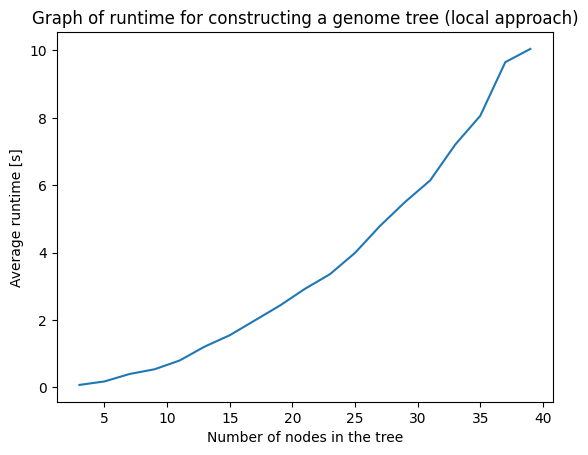

In [157]:
def local_experimental_analysis(n):
    """
    Generates a plot of the runtime of the local approach for constructing a genome tree.

    Parameters
    ----------
    n: int
      length of the list of genes

    Returns
    ----------
    None
    """

    runtime = []
    # stepsize=2, because we only want complete binary trees
    x_axis = [i for i in range(3, n, 2)]
    increasing_input_size = random_gene_generator(n)  # list of random genes of length n
    for i in increasing_input_size:  # traverse through all possible input sizes
        temporary_times = []
        for j in range(2): # Run the algorithm 5 times and take the average runtime
            gene_set_i = i # list of random genes of length input_size
            start = time.time() # start timer
            root = GeneologyTree(root="a")
            root.construct_minimum_spanning_BST(gene_set_i)
            end = time.time() # end timer
            time_elapsed = end-start # calculate runtime
            temporary_times.append(time_elapsed) # store runtime
        runtime.append(np.mean(temporary_times)) # calculate the average runtime and store it

    plt.plot(x_axis, runtime) # plot the runtime
    plt.title('Graph of runtime for constructing a genome tree (local approach)')
    plt.xlabel('Number of nodes in the tree')
    plt.ylabel('Average runtime [s]')


local_experimental_analysis(40)


### Global approach

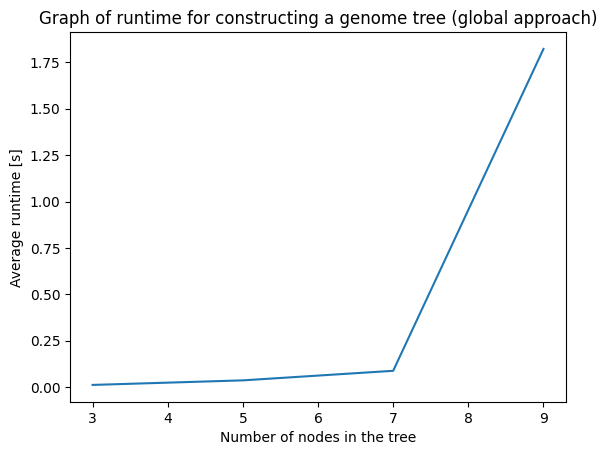

In [158]:
def global_experimental_analysis(n):
    """
    Generates a plot of the runtime of the global approach for constructing a genome tree.

    Parameters
    ----------
    n: int
        length of the list of genes

    Returns
    ----------
    None
    """
    
    def global_tree_generator(gene_set):
        """
        Constructs a global tree from a list of genes. 
        Helper function to global_experimental_analysis.

        Parameters
        ----------
        gene_set: list
            list of genes

        Returns
        ----------
        global_root: GeneologyTree
            root of the global tree        
        """
        arr = global_tree(gene_set)
        global_root = None
        global_root = binary_tree_from_level_order(arr, 0, len(arr))
        return global_root


    runtime = []
    x_axis = [i for i in range(3, n, 2)] # stepsize=2, because we only want complete binary trees
    increasing_input_size = random_gene_generator(n) # list of random genes of length n
    for i in increasing_input_size: # traverse through all possible input sizes
        temp_times = [] # list of runtimes
        for j in range(3): # Run the algorithm 3 times and take the average runtime
            start = time.time() # start timer
            global_tree_generator(i) # construct the tree
            end = time.time() # end timer
            time_elapsed = end-start # calculate runtime
            temp_times.append(time_elapsed) # store runtime
        runtime.append(np.mean(temp_times)) # calculate the average runtime and store it
    plt.plot(x_axis, runtime)
    plt.title('Graph of runtime for constructing a genome tree (global approach)')
    plt.xlabel('Number of nodes in the tree')
    plt.ylabel('Average runtime [s]')


global_experimental_analysis(10)


### Complexity analysis

As we could see, both solutions yielded the same result. When it comes to time complexity, the local approach is much faster than the global approach as seen from the graphs as well.

Firstly, for both techniques we have to calculate the Levenshtein distance for each pair of strings. 

Recurrence call for Levenshtein distance is: 

T(m, n) = {<br>
>0, if m is the empty string and n is the empty string <br>
>O(m), if n is the empty string<br>
>O(n), if m is the empty string<br>
>T(m[1:], m[1:]), if m[0] == n[0]<br>
>O(mn)+max(T(m/2,h)+T(m/2,n−h)), otherwise <br>

}

which is O(mn) time complexity. Since we only require space for one dynamic-programming pass at a time, O(mn) is the total space complexity (size of the 2d matrice). The space for recursion stack is negligible. For the sake of simplicy, lets assume strings are of same length M, and we have N strings in total. In such a case, the time complexity is O(M^2) and the space complexity is O(M^2).

Now, we are repeating this for every pair of strings which means we are doing it O(N^2) times. This means that the total time complexity for finding the levenshtein distance for every par of strings is O(N^2 * M^2), whereas the space complexity is O(N^2 + M^2) since we will, in worst case, have to matrices in memory at the same time. 
 


#### Local approach 

In the local approach, we choose the root by traversing the existing matrix of dimensions O(M^2) meaning that the time complexity is O(M^2) and then once again do BFS traversal of the matrix which is O(M^2) as well, meaning that the time complexity remains O(N^2 + M^2) and the space complexity is O(N^2 + M^2). From the graph, we approximately see that the time complexity is O(M^2) indicating the correctnes of our calculations.


#### Global approach

However, for the global approach we repeat the O(M^2) traversal through the matrix for every of the N! permutations, meaning that the time complexity is O(M^2 * N!) and the space complexity is O(N!) since we will have to store all the permutations in memory.

This awful time complexity is not seen in the graph because the number of genes inputted is small due to time constraints, but the jump in absolute times is drastic. 




Overall, since the local approach is guaranteed to give the optimal solution, given our metric, it is by far the superior choice here. However, if we were to use a different metric, such as the LCS, the greedy approach would not be guaranteed to give the optimal solution. In that case, depending on what you are prioritizing, you could choose either option.  In this case, there is not reason to choose the global option but to perhaps check the solution and once again verify that it is indeed the optimal solution. This is, of course, not feasible when the number of genes is large.

One way to improve the global approach is to limit the number of permutations that you do. In such a case, you would only generate a random subset of the permutations and then pick the one with the lowest score. This would be much faster than generating all possible permutations. However, it is not guaranteed to give the optimal solution. Yet, the time complexity will shrink drastically to O(k*i), where k is the number of permutations and i is the number of iterations.

# Question 5


#### How would you estimate the probabilities of insertions, deletions, and mutations?
1. Obviously, you don’t have enough data to obtain meaningful estimates, but this small dataset has enough information to intuitively formulate estimates for these probabilities. Explain your algorithmic approach in as much detail as possible.
2. Produce an estimation in Python that would take your algorithmic strategy into practice. If you obtain estimates for these probabilities, please critically assess your results.


Using the frequentist approach, we will use the Levenshtein distance algorithm  to estimate the probabilities of insertion, deletion, and mutation in a sequence. This algorithm calculates the minimum number of single-character edits (insertions, deletions, or substitutions) needed to transform one sequence into another. 

1. To obtain the probability of each operation, we will generate a Levenshtein matrix of the number of operations that can occur between two genes and traverse the matrix to determine the operations that were made from the initial point to the final answer. 
2. We will repeat this process for all parent-child relationships in our global tree and calculate the average number of operations for each operation by dividing the total number of operations by the number of relationships. As the result of this, we will have calculated the probability of insertion, deletion and mutation for every parent-child relationship in our global tree. 
3. Averaging these values out will give us the best possible estimate of these probabilities. This will enable us to determine the average probability of each operation occurring in this sequence.

Since we have no prior knowledge of the probabilities and no prior evidence to update our knowledge in accordance to our new knowledge (such as knowing the real world estimate which we would then update in light of our new knowledge), this approach is frequentist.  Finally, since we do not know whether the sequence given is a real-world set of sequences, we can not make inferences about the general real-world population and make inferences about the probabilities.

### Calculating the exact minimum number of insertions, deletions and mutations needed to transform the parent into the child (summing up to Levenshtein distance)

In [160]:
import numpy as np 

def exact_number_of_insertions_deletions_substitutions(matrix,sequence1,sequence2): 
    """
    Returns the exact number of insertions, deletions, and substitutions given a matrix and two sequences to get one sequence1 from sequence2.
    The sum of the number of insertions, deletions, and substitutions is the Levenshtein distance between the two sequences.
    Thus, we read the matrix from the bottom right to the top left, and we count the number of insertions, deletions, and substitutions.
    
    Example: 
    sequence1 = "ABC", sequence2 = "AM". Result: 2 insertions, 1 deletion, 0 substitutions (to obtain 'ABC' from 'AM')


    Inputs
    ----------
    matrix: array
        Matrix of the Levenshtein distance between two sequences
    sequence1: string
        First sequence
    sequence2: string
        Second sequence
    
    Returns
    ----------
    num_insertions: int
        Number of insertions
    num_deletions: int
        Number of deletions
    num_substitutions: int
        Number of substitutions
    """

    # Initialize the number of insertions, deletions, and substitutions to 0
    num_insertions, num_deletions, num_substitutions = 0, 0, 0

    # Initialize the indexes to 0
    i, j = 0, 0

    # Loop through the matrix
    while i <= len(sequence1) and j <= len(sequence2): # i and j are the indexes of the two sequences
        if i == len(sequence1): # If we have reached the end of the first sequence
            num_insertions += len(sequence2) - j # we have to insert the rest of the second sequence
            break
        elif j == len(sequence2): # If we have reached the end of the second sequence
            num_deletions += len(sequence1) - i # we have to delete the rest of the first sequence
            break
        elif sequence1[i] == sequence2[j]: # If the two sequences are the same, we don't have to do anything
            i += 1
            j += 1 

        else: # If the two sequences are different
            if matrix[i][j] == matrix[i+1][j] + 1: # If the next index of the first sequence is the same as the current index of the second sequence. DOWN
                num_deletions += 1 # We have to delete the current index of the first sequence
                i += 1 # We move to the next index of the first sequence
            elif matrix[i][j] == matrix[i][j+1] + 1: # If the next index of the second sequence is the same as the current index of the first sequence. RIGHT
                num_insertions += 1 # We have to insert the current index of the second sequence
                j += 1 # We move to the next index of the second sequence
            else: # If the next index of the first sequence is the same as the next index of the second sequence
                num_substitutions += 1 # We have to substitute the current index of the first sequence with the current index of the second sequence. DIAGONAL
                i += 1
                j += 1 

    return [num_insertions,num_deletions,num_substitutions]


assert sum(exact_number_of_insertions_deletions_substitutions(levenshtein_distance('A', 'A')[0], 'A', 'A')) == 0
assert sum(exact_number_of_insertions_deletions_substitutions(levenshtein_distance('ros', 'horse')[0], 'ros', 'horse')) == 3
assert sum(exact_number_of_insertions_deletions_substitutions(levenshtein_distance('AD', 'ABCE')[0], 'AD', 'ABCE')) == 3

sequence1 = 'ACAGCAAGCCATTCCTTAGAGAACGAAATTACGGCGACCGTCAGGGGCATAGCTCCGAGGCATACACTGACGTGTTGGGA'
sequence2 = 'CAGCAGCACAGTCCTGAGATAGCGAAATGAACCGCGACCGTCAGGGGCCTTCGGCCTCCCGAGGTATTACGGCTGACAGTGGTTGGGA'
assert sum(exact_number_of_insertions_deletions_substitutions(levenshtein_distance(sequence1, sequence2)[0], sequence1, sequence2)) == 22

#### Testing whether the algorithm above works

We can test the algorithm by seeing whether for every pair of strings in set_strings, the sum of the number of insertions, deletions and mutations is equal to the Levenshtein distance between the two strings. The code to do this is shown below.

In [161]:
test_results = []

# Loop through all the combinations of the set of strings
for row in range(len(set_strings)):
    for column in range(len(set_strings)):
        sequence1 = set_strings[row][1]
        sequence2 = set_strings[column][1]
        # Check if the sum of the number of insertions, deletions, and substitutions is equal to the Levenshtein distance
        test_results.append(sum(exact_number_of_insertions_deletions_substitutions(levenshtein_distance(sequence1, sequence2)[0], sequence1, sequence2)) == levenshtein_distance(sequence1, sequence2)[1])

# Check if all the tests passed by returning True
if all(test_results):
    print(f'All {len(test_results)} tests passed!')
else:
    print(f'{len(test_results) - sum(test_results)} tests failed!')

All 49 tests passed!


As we can see, the algorithm works as intended. The sum of the number of insertions, deletions and mutations is equal to the Levenshtein distance between the two strings.

#### Calculating the insertion, deletion, and mutation probabilities

This code calculates the average probability of mutation, deletion, and insertion in a given gene tree. It takes in a gene tree represented as a list of sequences in level order traversal and returns the average probabilities of each operation. 

1. The code first defines a dictionary containing the sequences as values and their names as keys. 
2. It then initializes empty lists for the probabilities of insertion, deletion, and mutation. It then loops through each pair of sequences (each parent-child) in the gene tree and calculates the number of insertions, deletions, and mutations needed to transform the first sequence into the second using the exact_number_of_insertions_deletions_substitutions and levenshtein_distance functions. 
3. It then calculates the probability of each operation by dividing the number of operations by the length of the first sequence and adds it to the corresponding list of probabilities. 
4. Finally, it calculates the average probabilities of each operation by dividing the sum of all probabilities by the number of sequences in the gene tree and returns these values.

In [163]:
def mutation_deletion_insertion_probabilities(gene_tree):
    """
    Returns the average mutation, deletion, and insertion probabilities given a gene tree.


    Inputs
    ----------
    gene_tree: list
        List of the gene tree as level order traversal


    Returns
    ----------
    mutation_probability: float
        Average mutation probability
    deletion_probability: float
        Average deletion probability
    insertion_probability: float
        Average insertion probability
    """

    set_strings_dict = {'a': 'ACAGCAAGCCATTCCTTAGAGAACGAAATTACGGCGACCGTCAGGGGCATAGCTCCGAGGCATACACTGACGTGTTGGGA',
                        'b': 'CAGCAGCACAGTCCTGAGATAGCGAAATGAACCGCGACCGTCAGGGGCCTTCGGCCTCCCGAGGTATTACGGCTGACAGTGGTTGGGA',
                        'c': 'GCACCAAGCCTTCACTAGAGGAACCCAGAACTAAGGGTCAGACCGTGTCGGGCCATGCATGCCGAGGTATTACGGACTAGTACGA',
                        'd': 'CAGCAGCACAGTCCTGAGATGACGAAATTAACCGGCGACCGTCAGGGGCCATAGCCTCCGGGGCATACGACTGACGTGGTGGGA',
                        'e': 'GCAGCAAGCCTTCACTTAGAGAACCGAAACTAGGGCAGACGGTCGGGCATGCATGCCGAGGATATACGGACTAGTACGGGA',
                        'f': 'GCTAGCACAAGCCTTCACTTAGATGAACCTAAACTAGGCAGACGGGTCGGCAAGCATAGTCCGAGGATATACAGCGACTAGTACGGG',
                        'g': 'CAGCAGACAGCTCCTTGTGATGAACGAAATCAACCGGCGACCATGCAGGCGGCCATAGCCTCCGGTGGCATCACGACTGAGCCGTGGTGGA'}

    all_insertion_probabilities, all_mutation_probabilities, all_deletion_probabilities,  = [], [], []

    # For each pair of sequences in the gene tree
    for sequence1, sequence2 in gene_tree:
        sequence1 = set_strings_dict[sequence1]
        sequence2 = set_strings_dict[sequence2]

        # Get the number of insertions, deletions, and substitutions needed to transform sequence1 into sequence2
        num_insertions, num_deletions, num_mutations = exact_number_of_insertions_deletions_substitutions(
            levenshtein_distance(sequence1, sequence2)[0], sequence1, sequence2)

        # Calculate the probability of each event by dividing the number of insertions by the length of the first sequence
        probability_of_insertion = num_insertions/len(sequence1)
        all_insertion_probabilities.append(probability_of_insertion) # Add the probability of insertion to the list of all insertion probabilities

        # Calculate the probability of each event by dividing the number of mutations by the length of the first sequence
        probability_of_mutation = num_mutations/len(sequence1)
        all_mutation_probabilities.append(probability_of_mutation) # Add the probability of mutation to the list of all mutation probabilities

        # Calculate the probability of each event by dividing the number of deletions by the length of the first sequence
        probability_of_deletion = num_deletions/len(sequence1)
        all_deletion_probabilities.append(probability_of_deletion) # Add the probability of deletion to the list of all deletion probabilities

    # Calculate the average probability of each event by dividing the sum of all probabilities by the number of sequences in the gene tree
    average_probability_of_insertion = sum(
        all_insertion_probabilities)/len(gene_tree)
    average_probability_of_mutation = sum(
        all_mutation_probabilities)/len(gene_tree)
    average_probability_of_deletion = sum(
        all_deletion_probabilities)/len(gene_tree)

    return [average_probability_of_insertion, average_probability_of_mutation, average_probability_of_deletion]


p_insertion, p_mutation, p_deletion = mutation_deletion_insertion_probabilities(local_tree.level_order(local_tree))
print("Based on the tree:\n")
local_tree.show_tree(local_tree, 0)

print('\nWe obtain the following probabilities:')
print(f'Average probability of insertion: {p_insertion}')
print(f'Average probability of mutation: {p_mutation}')
print(f'Average probability of deletion: {p_deletion}')


Based on the tree:

		➡️ Node b
	➡️ Node d
		➡️ Node g
➡️ Node a
		➡️ Node c
	➡️ Node e
		➡️ Node f

We obtain the following probabilities:
Average probability of insertion: 0.09390799529688416
Average probability of mutation: 0.04900426219870665
Average probability of deletion: 0.041089800117577895


Based on our calculation of probabilities, we know that there is an average of 9.39% chance of insertion, 4.109% chance of deletion, and 4.9% chance of mutation when transforming parent genes to child genes. 

This (odds of insertion $>$ deletion) suggests that our child nodes are more likely have a larger gene length, on average, compared to the parent nodes. Moreover, the small ratio between the number of insertions and deletions indicates that both operations have a similar probability of occurring. 

These probabilities can be used to predict potential genetic changes or additions to the genome tree if we were to insert new child nodes. Additionally, the low probabilities may indicate that we are using minimal operations when transforming a parent to a child, which could suggest that our tree is optimally ordered. However, it is worth noting that these probabilities only apply to the subset of genes we have been given and may not necessarily reflect the general probabilities for genetic operations. For example, muation rates in humans are estimated to be on the order of $10^{−4}$ to $10^{−6}$ per gene per generation which is significantly lower than what we obtained, indicating that the gene sequences we have been given are not representative of the general population.

# Question 6

#### List all the LOs and HCs you have exercised while working on this final assignment and a thorough justification of their application in about 50 words per LO and HC. Please provide a word count. A few notes:
1. For the LOs, review your previous assignments and in-class grades, and reflect on your application has evolved over time. You need to provide evidence that you have taken the feedback provided throughout the course into account to further your understanding of the course materials.
2. For the HCs, start by referring back to the HCs you had envisaged to be critical for this assignment (which you argued for in assignment 5), and explain how you used them to help you navigate the questions above. Then, explain why your HCs applications are thoughtful and solid.

## LOs


### #ComputationalCritique

I provide a comprehensive examination of the local and global approaches to solving the gene tree problem. I discuss the key characteristics of each approach, including their greedy and optimal features, respectively. I also offer suggestions on how each approach could be improved and highlight their limitations. To evaluate the performance of both approaches, I conduct experiments to measure their runtime and analyze their scaling behavior in practical and theoretical terms.

Words: 70

### #CodeReadability

I choose variable names that are easy to understand and ensured that every function has thorough docstrings. Additionally, I use functional programming techniques, such as chunking my code into functions, to make it more concise and readable; in some cases, I also use OOP to increase readability. The code also includes comments to help make it easy to follow.

Words: 59

#### #AlgostratDatastruct

I carefully consider the best data structures to use for each algorithm. For instance, when traversing the tree in level order, I use a queue to enable this type of traversal. I also use a set to efficiently look up visited nodes. For the dynamic sections of the local and global approaches, I implement 2D matrices for memoization, as they are both efficient and optimal for this purpose. All algorithms are fully explained.

Words: 72

#### #Professionalism

This paper adheres to all recommended and accepted conventions. The writing is clear and concise, and information is presented in a numbered format for easy readability and comprehension. The language is concise and avoids redundancy. The text is free from grammatical errors and properly punctuated. The only formatting errors present in the document are due to the conversion from .ipynb to pdf.

Words: 62

### #PythonProgramming

The first LCS function correctly produces all longest common subsequences, as confirmed by comprehensive and visually clear test cases placed within a try-catch-except block, to avoid code breaks, and assert statements. This same process is repeated for the function that counts the exact number of insertions, deletions, and substitutions. All code in this paper works correctly, as showcased by the trees produced and the probabilities found. Finally, I wrote Python code to visualize the gene tree, both from the object and level-order list.

Words: 80

### #ComplexityAnalysis

In this analysis, I examine the runtime complexity of both the local and global approaches, including a theoretical analysis of their asymptotic behavior in Big O notation and an experimental evaluation. I consider the worst-case scenario for each algorithm and provide a detailed justification for my analysis, explaining how each step of the algorithm contributes to the overall complexity. Finally, I compare the two approaches qualitatively and discuss their relative strengths and weaknesses.

Words: 73

## HCs

#### #algorithms

The global and local solutions are thoroughly analyzed, with step-by-step explanations of the algorithmic approach and any new concepts needed to understand it. The trade-offs between the two major algorithms are also discussed. I effectively implemented and explained several complex and sophisticated algorithms that incorporated dynamic programming, backtracking, recursion, and memoization (LCS, Levenshtein, exact Levenshtein updates, BFS, etc.). All algorithms are fully explained, including comments and docstrings.

Words: 67

#### #probabilities

I explain how to calculate probabilities for gene insertions, mutations, and deletions, and make inferences about their meaning in the context of the gene tree. The probabilities are calculated correctly, and I provide a thorough explanation of the results. I also discuss the frequentist or Bayesian approach and justify my choice. Throughout the paper, probabilities are heavily utilized to make assumptions (e.g. likelihood of gene differences increasing with the number of generations) and to make inferences (e.g. optimal ordering of the gene tree).

Words: 81

#### #deduction

Deductive reasoning was used all throughout the assignment, most notable, when we tried to solve the problem locally and globally. We used deductive reasoning to make assumptions, to propose algorithms, metrics and infer which trees are better than the others. We also used deductive reasoning to make inferences about the gene tree, such as the optimal ordering of the tree and the likelihood of gene differences increasing with the number of generations. E.g. deducing that the children tend to be more similar to the parents than the grandparents and using that to devise a local strategy.

Words: 92